In [1]:
# importing the necessary libraries
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Basic DataScience and ML Pipeline

In [2]:
#loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Basic EDA and Statistical Analysis

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
diabetes_data_copy = diabetes_data.copy(deep=True)

diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### To fill these NaN values the data distribution needs to be understood

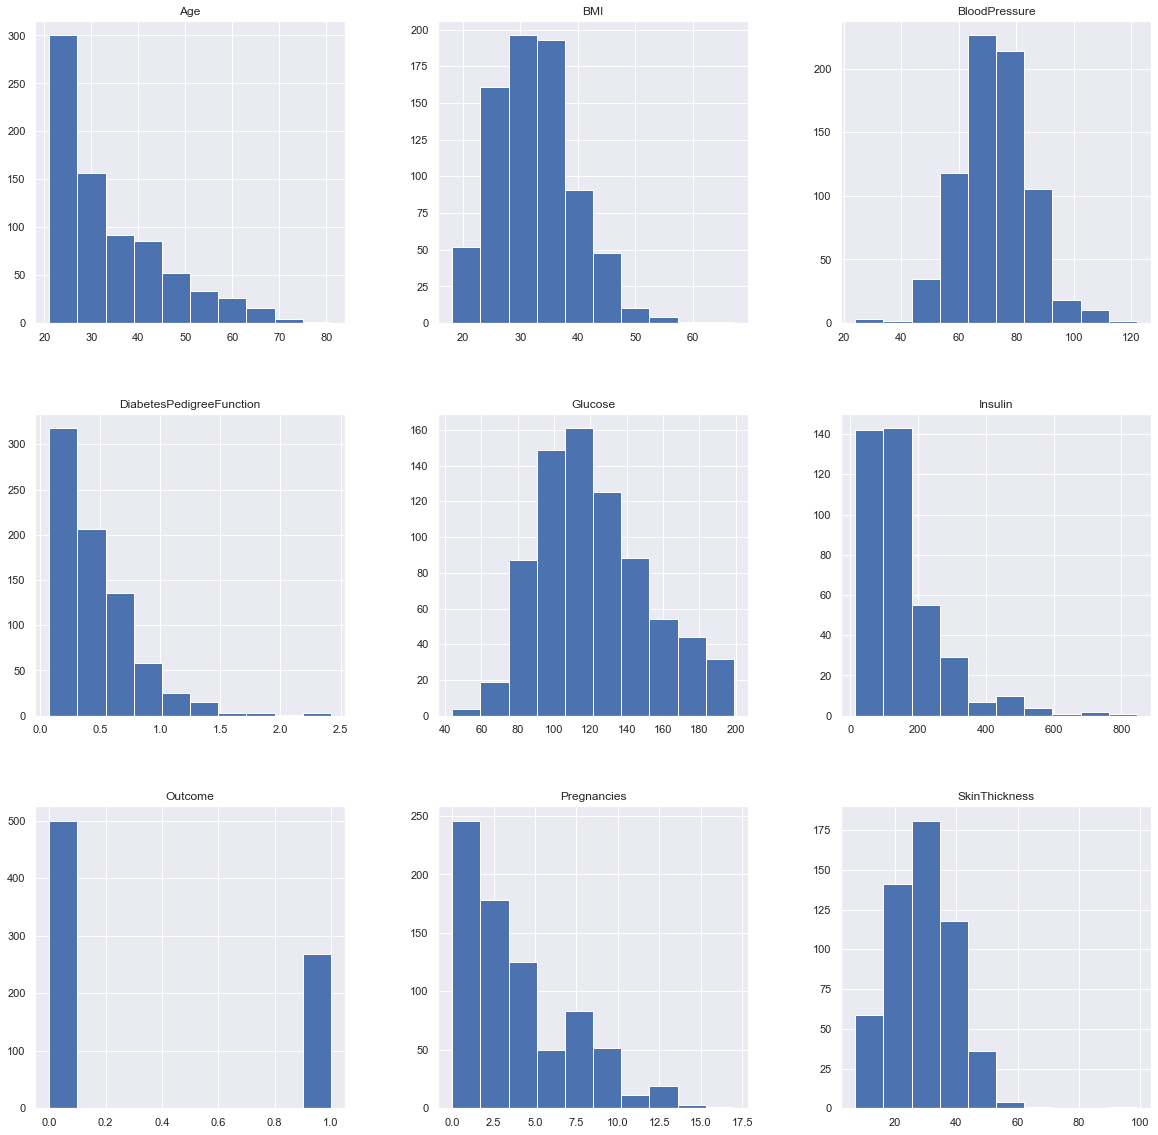

In [6]:
p = diabetes_data_copy.hist(figsize=(20,20))

In [7]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace=True)
diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace=True)
diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace=True)
diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace=True)
diabetes_data_copy.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [11]:
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace=True)
diabetes_data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

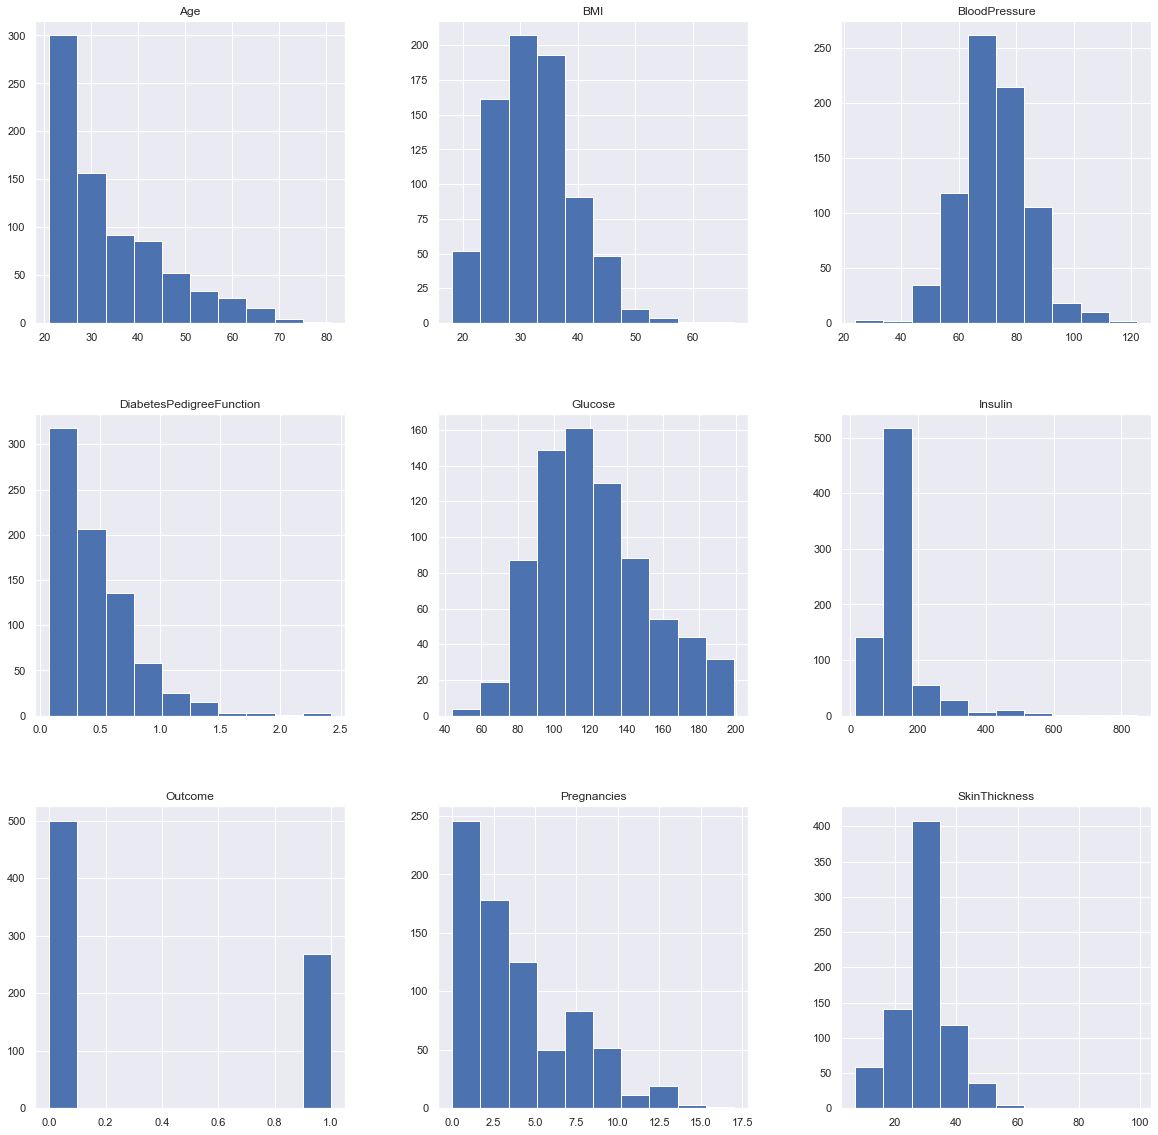

In [12]:
p = diabetes_data_copy.hist(figsize=(20,20))

In [13]:
diabetes_data_copy.shape

(768, 9)

In [14]:
diabetes_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [15]:
diabetes_data_copy.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

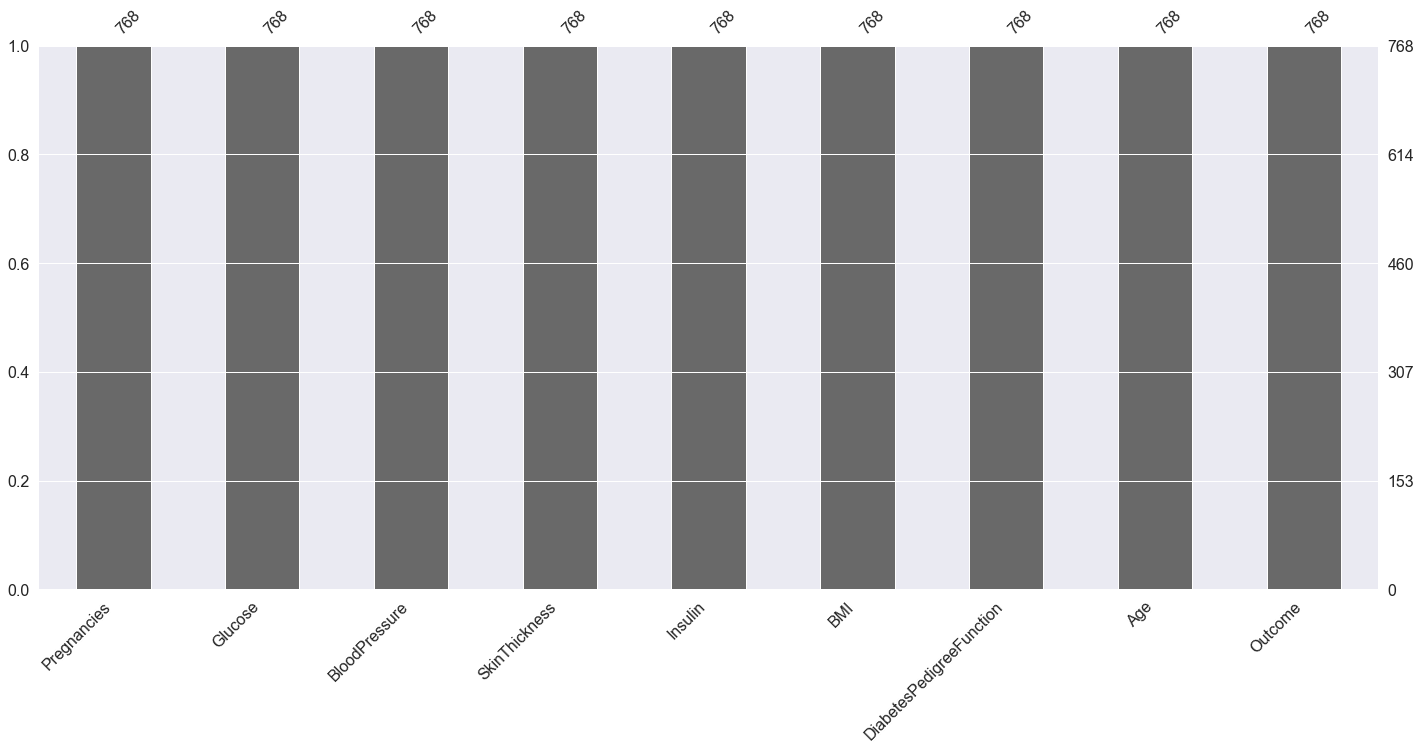

In [16]:
import missingno as msno
p = msno.bar(diabetes_data)

0    500
1    268
Name: Outcome, dtype: int64


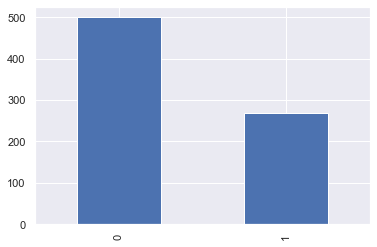

In [17]:
# Checking the balance of the data by plotting the count of outcomes by their value
color_wheel= {1: '#0392cf',
              2: '#7bc043'}
colors = diabetes_data['Outcome'].map(lambda x : color_wheel.get(x+1))
print(diabetes_data.Outcome.value_counts())
p = diabetes_data.Outcome.value_counts().plot(kind='bar')

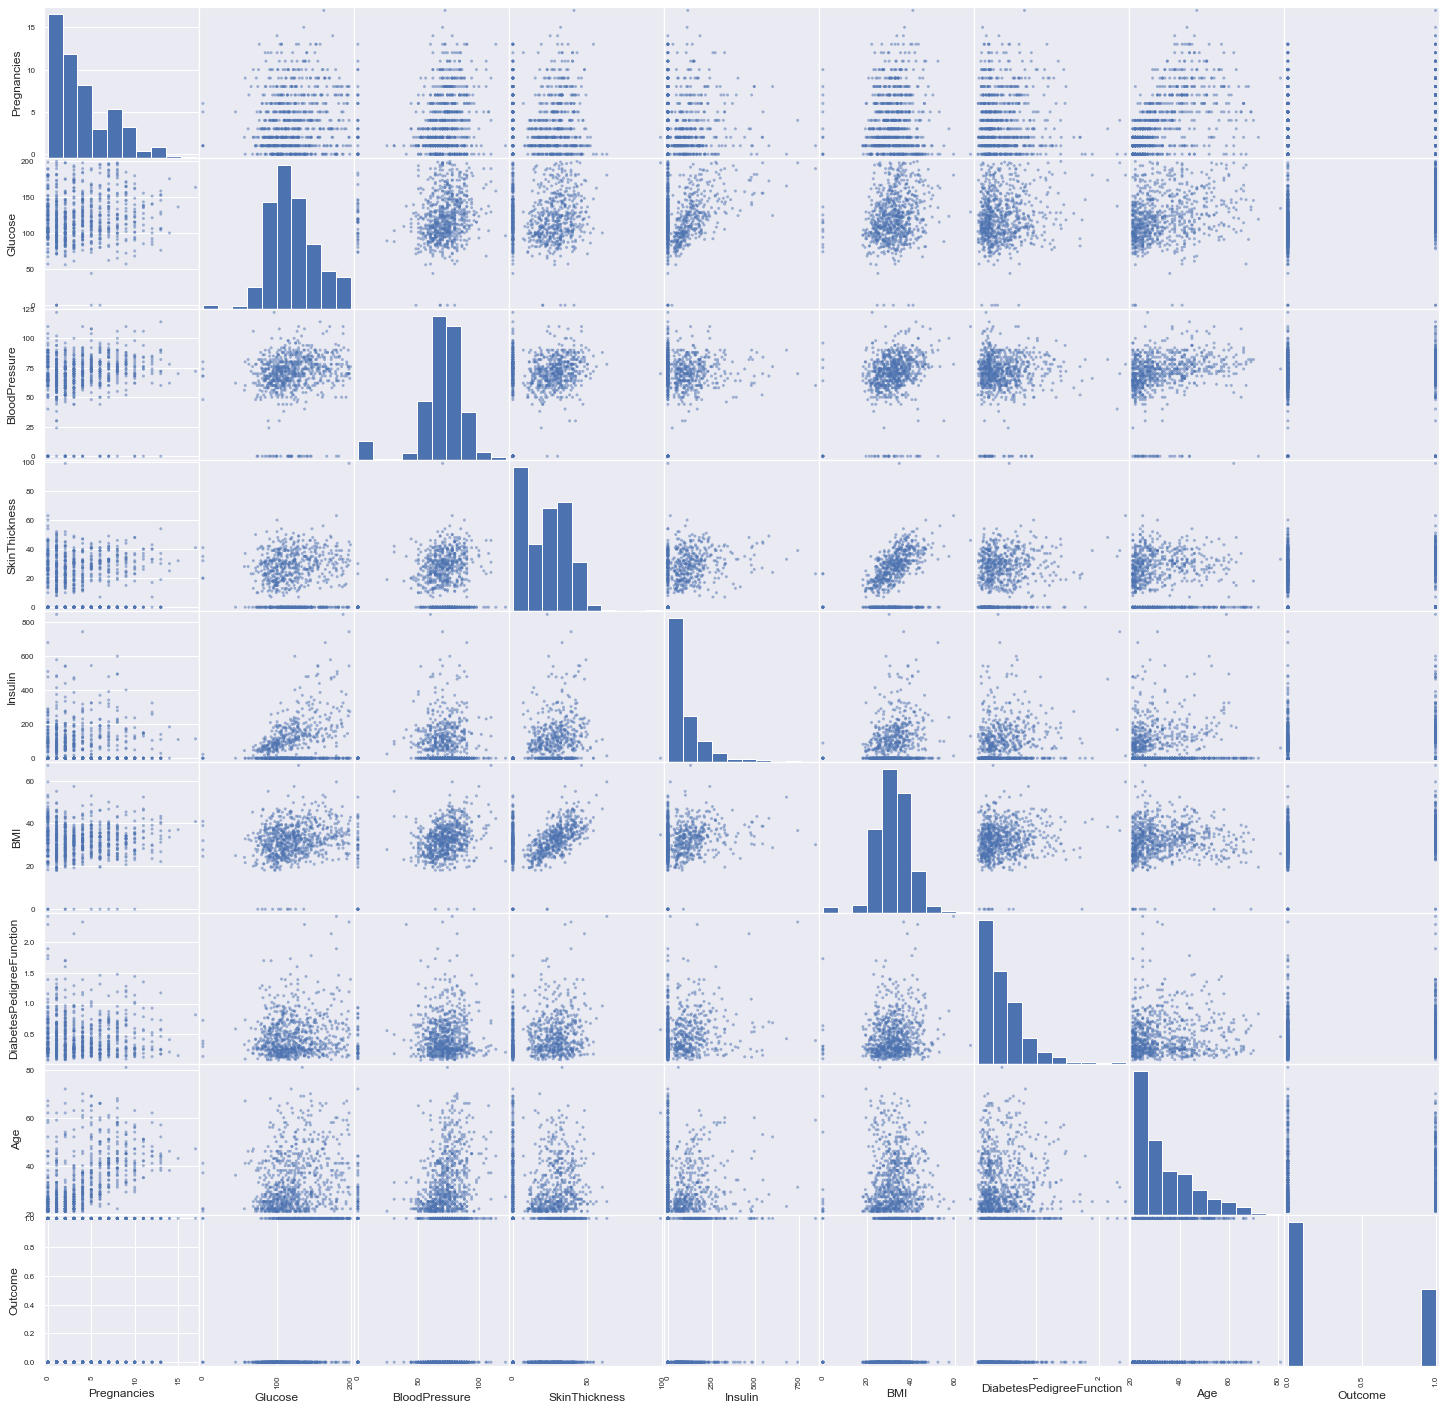

In [18]:
from pandas.plotting import scatter_matrix
p = scatter_matrix(diabetes_data, figsize=(25,25))

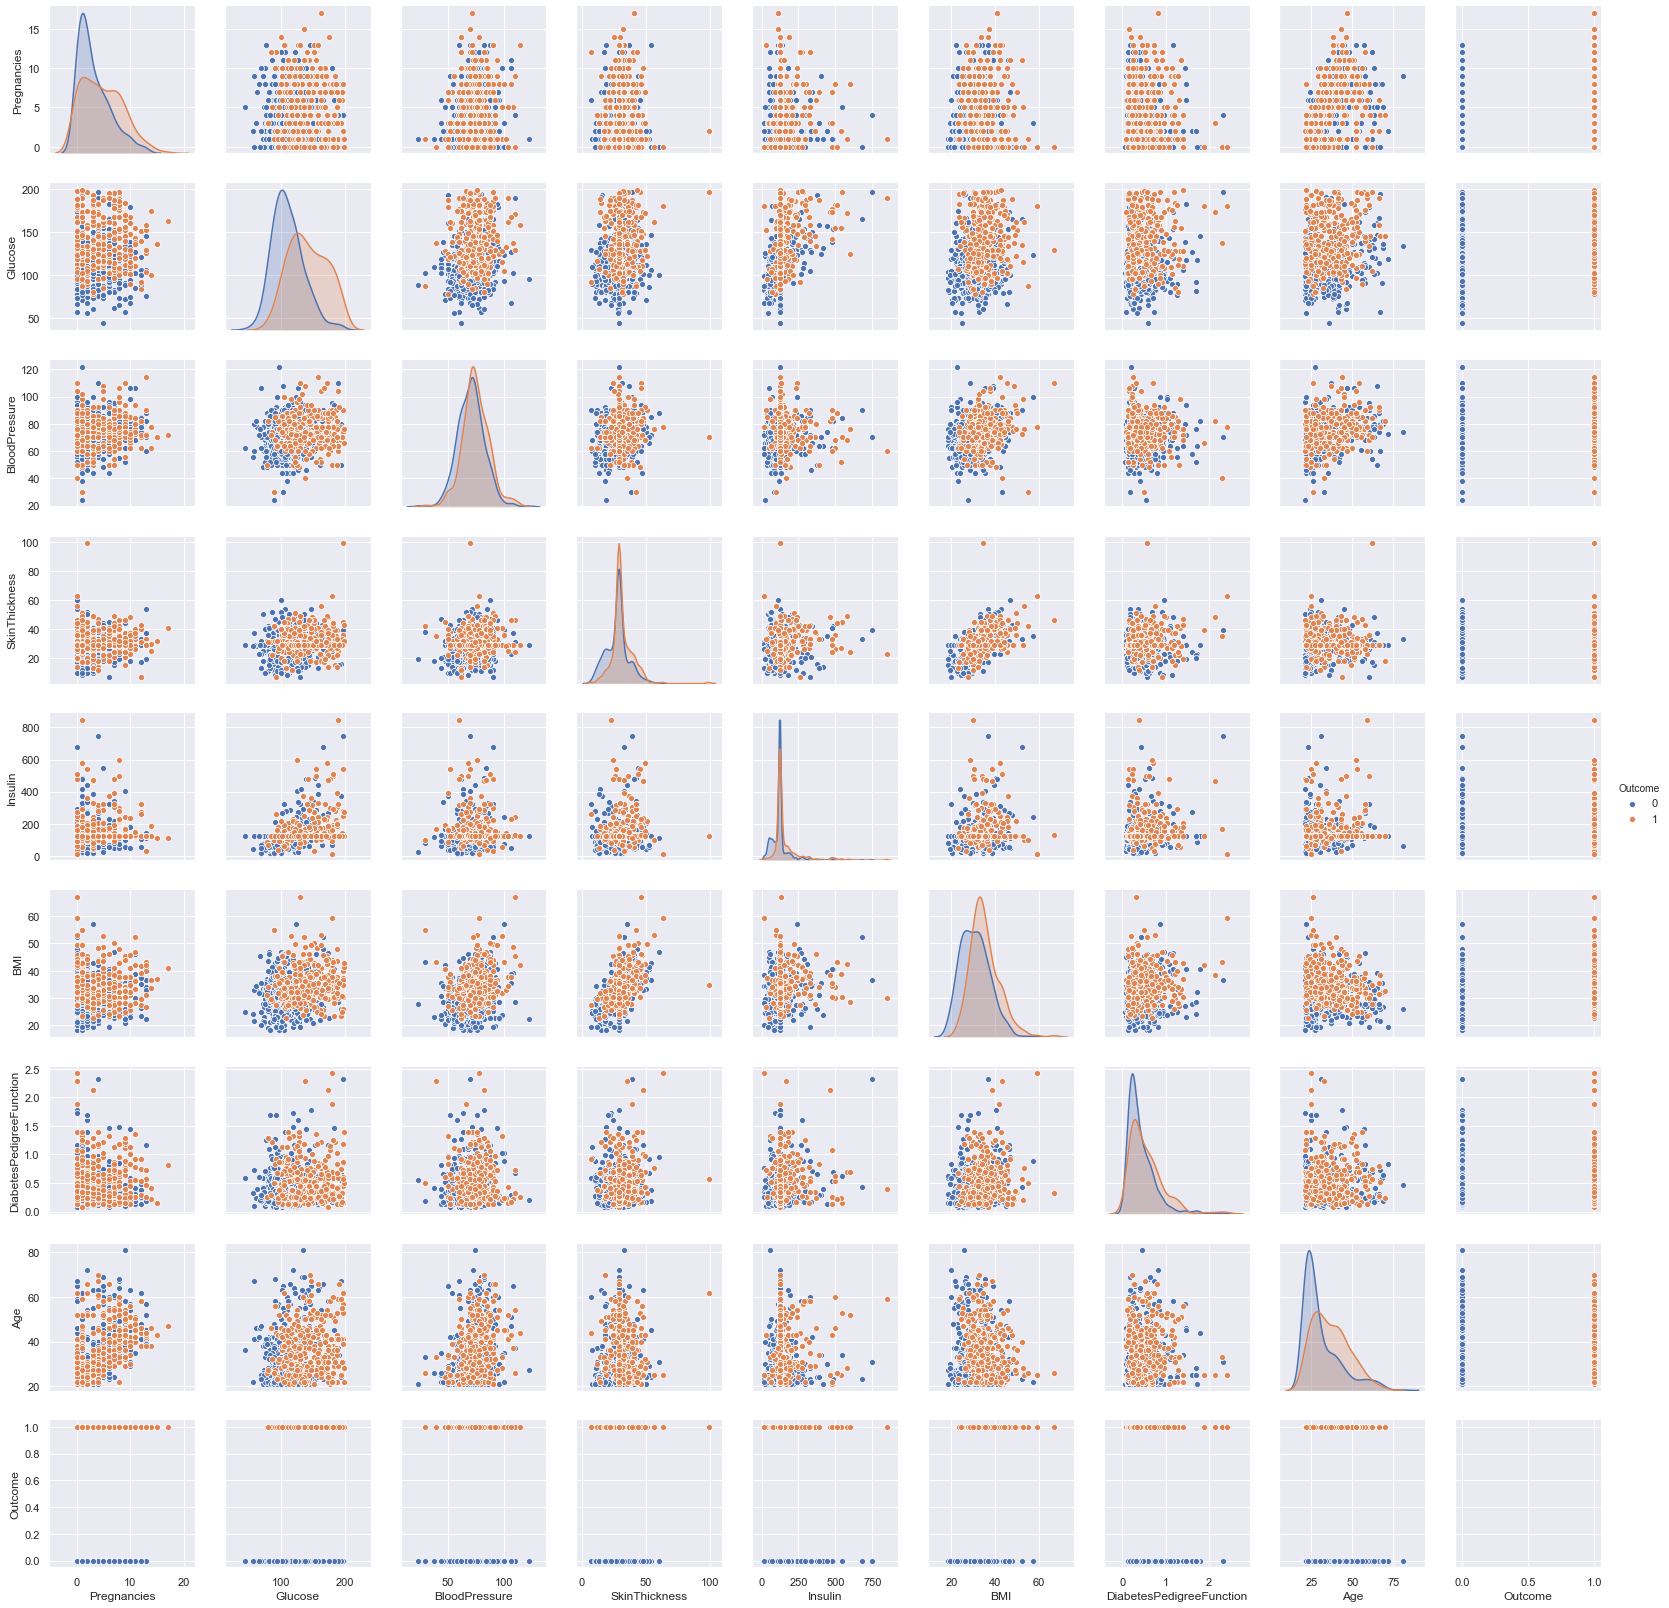

In [19]:
p = sns.pairplot(diabetes_data_copy, hue='Outcome')

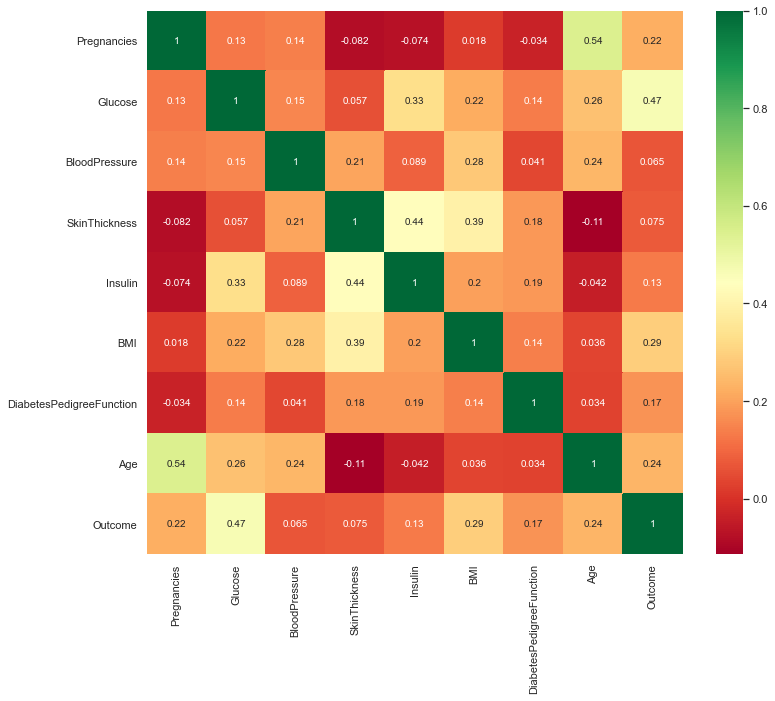

In [20]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

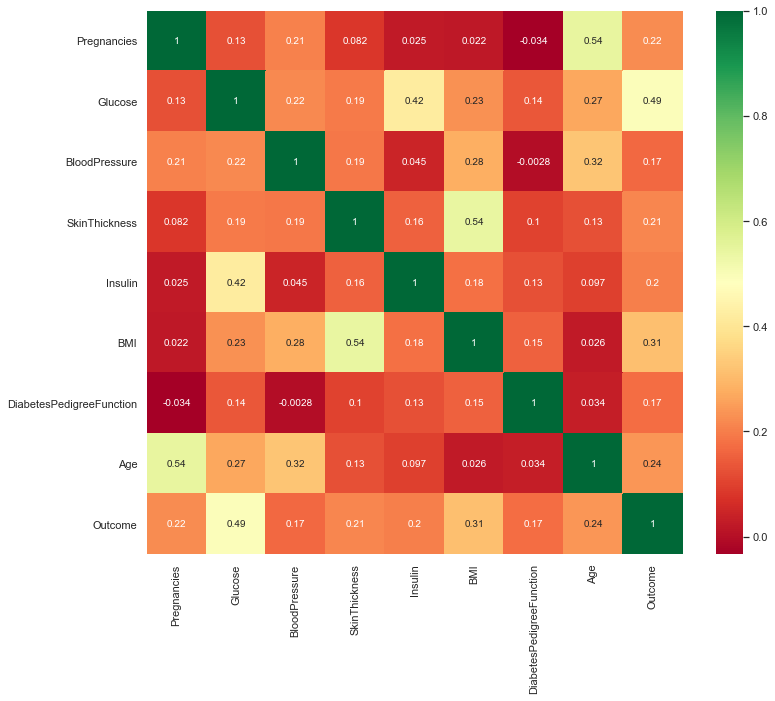

In [21]:
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_data_copy.corr(), annot=True, cmap='RdYlGn')

In [22]:
# scaling the data

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(['Outcome'], axis=1) ,), 
                 columns = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI',
                            'DiabetesPedigreeFunction','Age'])

In [23]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [24]:
y = diabetes_data_copy.Outcome

In [25]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state = 6, stratify=y)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

test_scores=[]
train_scores=[]

for i in range(1,15):
    
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test, y_test))

In [28]:
print(train_scores)
print(test_scores)

[1.0, 0.83203125, 0.857421875, 0.822265625, 0.82421875, 0.79296875, 0.828125, 0.80078125, 0.81640625, 0.791015625, 0.8046875, 0.7890625, 0.79296875, 0.78125]
[0.6875, 0.6953125, 0.70703125, 0.71484375, 0.71875, 0.72265625, 0.73046875, 0.7421875, 0.765625, 0.734375, 0.75, 0.7265625, 0.7578125, 0.7578125]


In [29]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i,v in enumerate(train_scores) if v == max_train_score]
print('Max of train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x : x+1, train_scores_ind))))

Max of train score 100.0 % and k = [1]


In [30]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i,v in enumerate(test_scores) if v == max_test_score]
print('Max of test scores {} % and k = {}'.format(max_test_score*100, list(map(lambda x : x+1, test_scores_ind))))

Max of test scores 76.5625 % and k = [9]


## Result Visualization

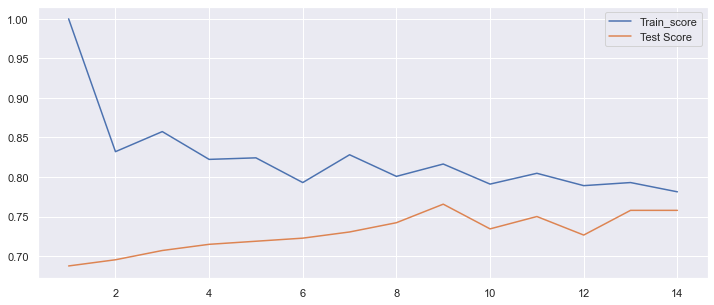

In [31]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15), train_scores, markers='*', label='Train_score')
p = sns.lineplot(range(1,15), test_scores, markers='o',label='Test Score')

#### The best result is captured at k = 9 hence 9 is used for the final scores

In [32]:
knn = KNeighborsClassifier(9)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.765625

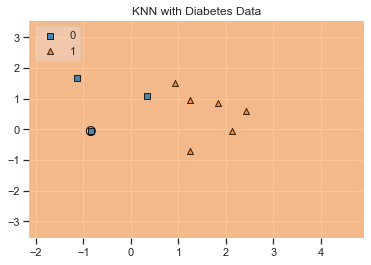

In [33]:
# Trying to plot Decision boundary

value = 20000
width = 20000

plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight = X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [36]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins='True')

Predicted,0,1,All
True,,,
0,149,18,167
1,42,47,89
All,191,65,256


Text(0.5, 12.5, 'Predicted label')

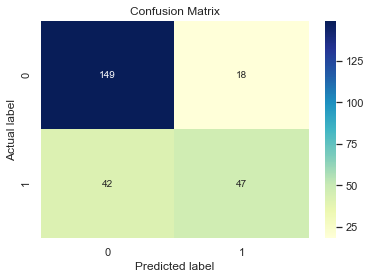

In [37]:
    y_pred = knn.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
    plt.title('Confusion Matrix', y=1.1)
    plt.ylabel('Actual label')    
    plt.xlabel('Predicted label')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       167
           1       0.72      0.53      0.61        89

    accuracy                           0.77       256
   macro avg       0.75      0.71      0.72       256
weighted avg       0.76      0.77      0.76       256



In [39]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
y_pred_proba

array([0.33333333, 0.44444444, 0.33333333, 0.33333333, 0.        ,
       0.55555556, 0.        , 0.22222222, 0.55555556, 0.44444444,
       0.11111111, 0.        , 0.11111111, 0.22222222, 0.11111111,
       0.55555556, 0.44444444, 0.44444444, 0.11111111, 0.77777778,
       0.11111111, 0.        , 0.66666667, 0.        , 0.33333333,
       0.22222222, 0.        , 0.44444444, 0.55555556, 0.33333333,
       0.33333333, 0.22222222, 0.        , 0.11111111, 0.66666667,
       0.33333333, 0.        , 0.11111111, 0.66666667, 0.22222222,
       0.44444444, 0.77777778, 0.33333333, 0.11111111, 0.        ,
       0.33333333, 0.        , 0.33333333, 0.44444444, 0.44444444,
       0.66666667, 0.        , 0.44444444, 0.66666667, 0.33333333,
       0.22222222, 0.        , 0.66666667, 0.        , 0.        ,
       0.11111111, 0.44444444, 0.        , 0.33333333, 0.11111111,
       0.11111111, 0.77777778, 0.77777778, 0.55555556, 0.        ,
       0.11111111, 0.11111111, 0.33333333, 0.55555556, 0.55555

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print('FPR')
print(fpr)
print('TPR')
print(tpr)
print('Thresholds')
print(thresholds)

FPR
[0.         0.00598802 0.01197605 0.02994012 0.07185629 0.10778443
 0.19760479 0.34730539 0.48502994 0.73053892 1.        ]
TPR
[0.         0.01123596 0.08988764 0.17977528 0.34831461 0.52808989
 0.66292135 0.87640449 0.93258427 1.         1.        ]
Thresholds
[2.         1.         0.88888889 0.77777778 0.66666667 0.55555556
 0.44444444 0.33333333 0.22222222 0.11111111 0.        ]


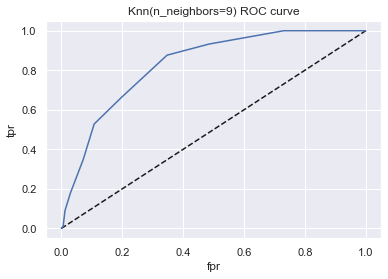

In [41]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=9) ROC curve')
plt.show()

In [42]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8295431608692727

In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}
